In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file = "c:\\Users\\dan\\Desktop\\IC Complexos\\Minha base de dados\\Utilan Dados Separados\\Dados dos retornos 2010 (utilan)\\retornos da carteira de 2010 Utilan.xlsx"
retornos = pd.read_excel(file, header=0)
retornos

,MÊS,OGXP3,AMBV4,CIEL3,MILK11,BRFS3
0,janeiro,-0.005917,-0.010863,0.000667,1.142857,0.019417
1,fevereiro,-0.062500,0.005896,-0.056667,-0.270588,-0.023256
2,março,0.057143,-0.063326,0.183746,-0.193548,0.086168
3,abril,0.033033,0.036503,0.008955,-0.213333,-0.063883
4,maio,-0.057558,0.026635,-0.088757,-0.008475,0.039251
5,junho,0.031462,0.037244,-0.012987,-0.230769,0.017167
6,julho,0.111842,0.058196,0.039474,-0.022222,0.042616
7,agosto,0.123185,0.016336,-0.050633,-0.170455,-0.046945
8,setembro,0.056034,0.059745,-0.018000,-0.219178,0.093418
9,outubro,0.012245,0.153328,-0.006789,0.368421,-0.041553


In [3]:
retorno_medio = retornos.mean() #método mean checado
retorno_medio

OGXP3     0.016298
AMBV4     0.032520
CIEL3    -0.006654
MILK11    0.009528
BRFS3     0.018982
dtype: float64

In [4]:
cov = retornos.cov()
cov

,OGXP3,AMBV4,CIEL3,MILK11,BRFS3
OGXP3,0.004742,0.000685,0.001357,-0.005968,-0.000074
AMBV4,0.000685,0.003224,-0.002031,-0.000724,-0.000624
CIEL3,0.001357,-0.002031,0.005352,0.001527,0.000968
MILK11,-0.005968,-0.000724,0.001527,0.163720,-0.001880
BRFS3,-0.000074,-0.000624,0.000968,-0.001880,0.002793


In [5]:
file = "c:\\Users\\dan\\Desktop\\IC Complexos\\Minha base de dados\\Utilan Dados Separados\\Dados dos retornos 2010 (utilan)\\retornos da carteira de 2010 Utilan.xlsx"
retorno1 = pd.read_excel(file, header=0)
retorno1

,MÊS,OGXP3,AMBV4,CIEL3,MILK11,BRFS3
0,janeiro,-0.005917,-0.010863,0.000667,1.142857,0.019417
1,fevereiro,-0.062500,0.005896,-0.056667,-0.270588,-0.023256
2,março,0.057143,-0.063326,0.183746,-0.193548,0.086168
3,abril,0.033033,0.036503,0.008955,-0.213333,-0.063883
4,maio,-0.057558,0.026635,-0.088757,-0.008475,0.039251
5,junho,0.031462,0.037244,-0.012987,-0.230769,0.017167
6,julho,0.111842,0.058196,0.039474,-0.022222,0.042616
7,agosto,0.123185,0.016336,-0.050633,-0.170455,-0.046945
8,setembro,0.056034,0.059745,-0.018000,-0.219178,0.093418
9,outubro,0.012245,0.153328,-0.006789,0.368421,-0.041553


#### Checando o método cov

In [6]:

np.cov(retornos["OGXP3"],retornos["AMBV4"])


array([[0.00474244, 0.00068509],
       [0.00068509, 0.00322437]])

In [7]:
#Número de ações

num_acoes = 5
num_carteiras = 10000

#Listas 

lista_retornos = []
lista_volatilidade = []
lista_pesos = []

#acrescentando a lista_peso o peso selecionado pela tese e posteriormente calculando a volatilidade e acrescentando a lista_volatilidade
#lista_pesos.append([0.0435, 0.4261, 0.2348, 0.0091, 0.2865])
#print(lista_pesos)

In [51]:
# Laço recursivo para preenchimento das listas

for i in range(num_carteiras):
    
    #soteando o uma listas de pesos do tamanho do num_acoes com o método np.random.random
    peso = np.random.random(num_acoes)
    
    #garantindo que a soma dos pesos será igual a uma unidade
    peso /= np.sum(peso)
    
    #acrescentando os pesos sorteados à lista de pesos com o método append
    lista_pesos.append(peso)
    
    #calculando o retorno esperado
    retorno_esperado = np.dot(peso, retorno_medio)
    
    #acrescentando o retorno_esperado a sua lista
    lista_retornos.append(retorno_esperado)
    
    #calculando a volatilidade 
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
    
    #acrescentando a volatilidade a lista
    lista_volatilidade.append(volatilidade)
    

In [9]:
#Podemos fazer um teste acrescentando a lista_pesos o peso ideal selecionado pela tese e sua respectiva volatilidade e comparar a relação return/risk encontrado pelo código e pelo método

In [52]:
#Dicionário do risco e retorno das carteiras

dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade': lista_volatilidade}

In [54]:
#Criação do Dataframe portifolios para plotagem

portifolios = pd.DataFrame(dic_carteiras)
portifolios

,Retorno,Volatilidade
0,0.016226,0.091834
1,0.014983,0.033483
2,0.013608,0.056367
3,0.017688,0.075617
4,0.016927,0.124225
...,...,...
19995,0.013403,0.104063
19996,0.006241,0.146844
19997,0.013147,0.058755
19998,0.014192,0.111928


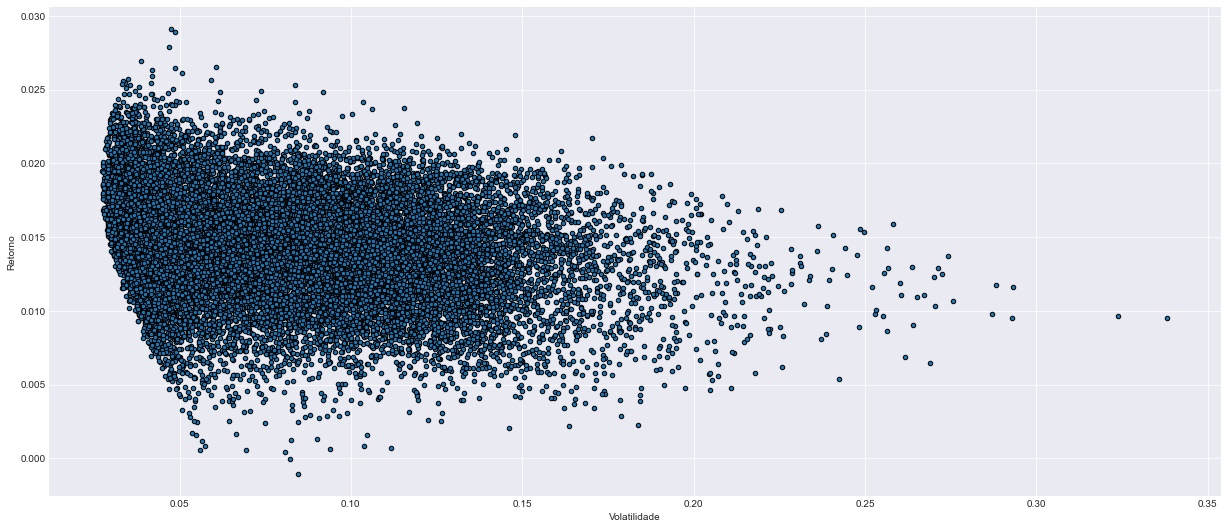

In [60]:
plt.style.use('seaborn-dark')
portifolios.plot.scatter(x='Volatilidade', y='Retorno', edgecolors = 'black', figsize=(21,9), grid=True)

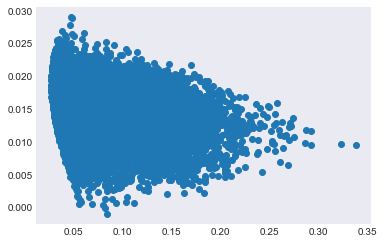

In [58]:
plt.scatter(lista_volatilidade, lista_retornos)

In [13]:
returns = np.array(lista_retornos)
risk = np.array(lista_volatilidade)
returnRisk = returns / risk
index = returnRisk.argmax()
print(index)
lista_pesos[index] 

array([0.07848101, 0.46216841, 0.06090958, 0.00822286, 0.39021814])

1924


In [22]:
lista_pesos[index] *100

array([ 7.84810111, 46.21684079,  6.09095819,  0.8222861 , 39.02181381])

### Checando o método os métodos max() e argmax() 

In [15]:
numero = 0
for i in range(num_carteiras):
    if numero < returnRisk[i]:
        maior = returnRisk[i]
        numero = maior
print(maior)

0.7731071908891796


In [16]:
returnRisk.max()

0.7731071908891796

In [17]:
returnRisk.argmax()

1924

In [18]:
returnRisk[returnRisk.argmax()]

0.7731071908891796

### Achando o menor risco

In [131]:
risco = np.array(lista_volatilidade)
risco.argmin()

1307

In [134]:
print(lista_pesos[1307]*100)

[ 5.37242493 41.34579287 19.0607847   0.83588092 33.38511658]


### calculando a correlação entre os pesos seleionados por Utilan e selecionados pelo código

In [136]:
l3=[0.0435, 0.4261, 0.2348, 0.0091, 0.2865]
l4=[ 5.37242493,41.34579287,19.0607847,0.83588092,33.38511658]
corr1 = np.corrcoef(l3,l4)
print(corr1)

[[1.         0.98161125]
 [0.98161125 1.        ]]


### Pesos selecionados pelo programa
##### para 10000 carteiras alguns dos pesos selecionados pelo programa foram:

array([11.32523527, 49.47613729,  0.78556664,  1.67232447, 36.74073632])

array([12.31077019, 47.45582286,  5.47038454,  1.30520145, 33.45782095])

##### para 100000 carteiras alguns dos pesos selecionados pelo programa foram:

array([ 9.9802325 , 48.48531676,  4.62726564,  0.89306405, 36.01412105])

array([ 3.46426949, 51.3740096 ,  5.98075182,  1.10041499, 38.08055409])

### Percebemos que os pesos tem alguma relação com o retorno médio de cada ativo
OGXP3     0.016298  1,6

AMBV4     0.032520  3,2

CIEL3    -0.006654 -0,6

MILK11    0.009528  0,9

BRFS3     0.018982  1,8

#### retorno da carteira efetiva

In [19]:
retornoCarteiraEfetiva = np.dot(lista_pesos[index], retorno_medio)
retornoCarteiraEfetiva * 100

2.338901429168319

In [20]:
#retorno da carteira de Utilan - resultado não explorado pela tese, pois o retorno é calculado para o ano subsequente
pesos_utilan = np.array([0.0435, 0.4261, 0.2348, 0.0091, 0.2865])
retornoUtilan = np.dot(pesos_utilan, retorno_medio)
retornoUtilan * 100

1.8528426288609061

### Checando qual a relação de returnRisk para o peso selecionado por Utilan

In [21]:
pesoUtilan = np.array([0.0435, 0.4261, 0.2348, 0.0091, 0.2865])
volatilidade_Utilan = np.sqrt(np.dot(pesoUtilan.T, np.dot(cov, pesoUtilan)))
retorno_esperado_Utilan = np.dot(pesoUtilan, retorno_medio)

print(volatilidade_Utilan)
print(retorno_esperado_Utilan)

retornoRisco = retorno_esperado_Utilan/volatilidade_Utilan
print(retornoRisco)

0.027229770438227285
0.01852842628860906
0.6804473923363454


## Checando aonde no gráfico estão as duas carteiras otimas selecionadas pelo código e por Utilan

In [30]:
#checando a posição dos retorno e da volatilidade da cartiera selecionada
print(lista_retornos[index])
print(lista_volatilidade[index])
lista_retornos[index]/lista_volatilidade[index]

0.02338901429168319
0.030253261859823872


0.7731071908891796

--------retorno---------------volatilidade
daniel--0.02338901429168319---0.030253261859823872
utilan--0.01852842628860906---0.027229770438227285

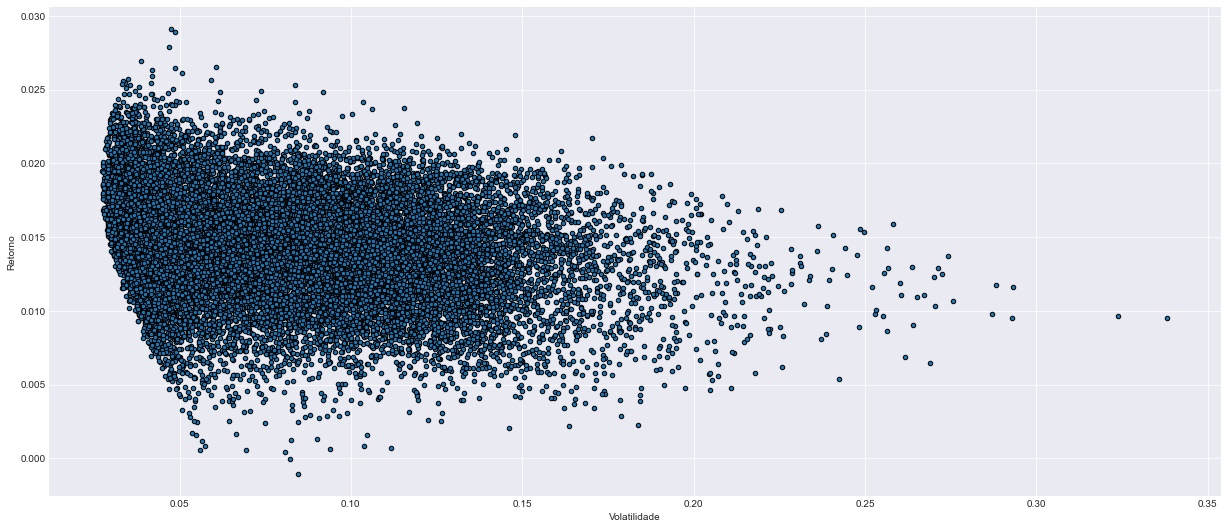

In [61]:
plt.style.use('seaborn-dark')
portifolios.plot.scatter(x='Volatilidade', y='Retorno', edgecolors = 'black', figsize=(21,9), grid=True)

"A planilha está devidamente parametrizada para apresentar, como resultado, o percentual de participação de cada ação na carteira de mínimo risco da fronteira eficiente" tese Utilan pág 81

"A ferramenta Solver da planilha eletrônica Microsoft Excel 2003, parametrizada de acordo com o método de Markowitz para otimizar retornos no menor risco foi executada, e gerou, como resultado, o percentual de participação de cada ação na carteira de mínimo risco da fronteira eficiente" tese Utilan pág 99

## Tentando encontrar peso próximos ao proposto pela tese através da razão retorno risco

In [85]:
returnRisk[(returnRisk>0.68)]

array([0.68302093, 0.73283937, 0.72034189, 0.74853017, 0.73957972,
       0.69793602, 0.73018853, 0.7097367 , 0.69292141, 0.69935955,
       0.69074232, 0.68959562, 0.69581858, 0.77310719, 0.72068032,
       0.72701862, 0.70363778, 0.71013457, 0.72929413, 0.74188452,
       0.75039489, 0.7381857 , 0.733859  , 0.76816854, 0.70832151,
       0.73426795, 0.77059137, 0.68653645, 0.72670561, 0.72601104,
       0.6935702 , 0.72841419, 0.69298011, 0.68371625, 0.69977793,
       0.72883063, 0.69976099, 0.70048599, 0.70485923, 0.74449744,
       0.70537251, 0.72551914, 0.7351372 , 0.71078951, 0.73510634,
       0.68052515])

In [123]:
for i in range(num_carteiras):
    if returnRisk[i]==0.6568155618149302:
        print(i)


279


In [84]:
for i in range(num_carteiras):
    print(returnRisk[i])


0.1766848223571372
0.44747219459485016
0.24141020552272588
0.23391630922554416
0.13626162222593763
0.6083871733755072
0.12291938372793451
0.4516298300749352
0.47381602819660207
0.4035627890062791
0.556592881499224
0.14132797609487097
0.24211783912371526
0.6653444486096938
0.23465934759659407
0.31682517851875464
0.30144593805525477
0.10422164398490812
0.23839964584293336
0.1087056686473795
0.2508771414507462
0.14331442515091597
0.24602912982634972
0.48595743417708825
0.1407392324045933
0.3040054528747057
0.13600811741805552
0.2908244605441419
0.35810402270557634
0.20042980324082052
0.08694417592458405
0.5238095231171792
0.08960172865439246
0.16014661847728123
0.07421496388424915
0.15008746780493523
0.28093293228515187
0.108271215796615
0.13285437307554263
0.2385329210148339
0.20987924214769899
0.10113874439754265
0.11962782619382381
0.23310870750915352
0.12895622940719162
0.08354970408879976
0.5764640657596365
0.1773130134708793
0.15271750394704892
0.22952418711535816
0.2895141819936772

0.2517441811502386
0.3820643326734258
0.1303958720825129
0.09936823747063525
0.33484019455601965
0.0750840978896492
0.09193049496610894
0.09912380770363646
0.32257137113168194
0.401306934387797
0.33364876560702506
0.4279279950267604
0.28521485044660333
0.09920789377284588
0.10787404315455765
0.1428078946273596
0.37349641537680156
0.37536803284492964
0.11333439101383398
0.2359349380475016
0.15378649293073865
0.22451191370575674
0.15425702844996497
0.4494903432641781
0.2878377871071644
0.2333993733511956
0.3816457363998915
0.31410118090269723
0.0781309630775045
0.16606935448557067
0.2957936524085011
0.14335969314258398
0.10459211529593149
0.133068662038344
0.11645528566306132
0.3748935664686769
0.17248327035702934
0.10647649503579597
0.2629553760082411
0.2379043544241506
0.502576065968899
0.10209206530043985
0.20548571567148702
0.15182464580054875
0.10360833069712193
0.12670537987880356
0.6086351630321295
0.10882089532421171
0.11007322824866399
0.13326659437710445
0.7097367011942605
0.22

0.47179044062288605
0.21432246201057353
0.1366035114079576
0.15236613664825013
0.12172100282391851
0.14313301695257838
0.2417102771943771
0.11629429005918648
0.10049936306462855
0.19576295199151517
0.1504628634301344
0.26696757253645886
0.13853603537015557
0.10545235594811964
0.2115610627286577
0.08724519101132194
0.0632829978288594
0.44176270247836996
0.30693688511810935
0.15050864268495534
0.07184434250010127
0.5423012772759473
0.4587902922358943
0.19311791979012072
0.4000765353718351
0.4968934842006141
0.19933766103569628
0.1212349702139281
0.5834092840417715
0.16871666645528985
0.10941998911694696
0.14250762970606776
0.28250668713975
0.16430566566670401
0.23193869783108617
0.33542822237390996
0.16278070045759077
0.14820908641912356
0.2778783437251211
0.10016792436541051
0.24243094793000525
0.3616156088077725
0.14264214226518313
0.6493099341688474
0.4299774511341493
0.06756178428256795
0.12917355560450744
0.2038313129552547
0.16758102581879
0.24502159692738593
0.22274734210708358
0.

0.25202628337912675
0.3340251504198175
0.12691780605606587
0.4985763058627956
0.14785823795791336
0.14042811454992926
0.23071511249138418
0.1077108369262841
0.09008961322561289
0.1456392850259178
0.14116958188042283
0.22712322436157925
0.14305569679619876
0.10106511832278137
0.17062348406277103
0.11313406893248426
0.38660085670575955
0.21259530613988642
0.17067571457088115
0.14753518982450844
0.3344018390306798
0.1912497509125967
0.10580901034478975
0.15782195429087428
0.10017260898841013
0.12089296966707658
0.3720530404522677
0.331633769021502
0.34003612942063066
0.43264663322318764
0.2183102724602111
0.09204698478498087
0.13614058997683526
0.26362304631758454
0.13872819420194074
0.24257129331475225
0.21808489255438035
0.1937766275385666
0.16442811530724477
0.3998130065482115
0.0647459989217464
0.12253842530945186
0.4471228143156898
0.1832956062115394
0.10443275470709118
0.20331275173903748
0.1079169251518488
0.11319150155700931
0.14357461401404137
0.22963242489417782
0.11836819365064

0.1198450590427295
0.48665222552655607
0.17349020077053445
0.22522530462633242
0.22557031333628755
0.2550853763616656
0.21470931125874537
0.15709731071450367
0.10012534461834614
0.4847149630280432
0.05779760919723252
0.19453649847145393
0.09015142531144102
0.14111886207505586
0.17414971318911424
0.17928732265082253
0.12174018040154971
0.03825648730499233
0.13659989576268441
0.1277518258413161
0.11945135968589934
0.11366646212702457
0.2929619884670897
0.07095786212896274
0.26193208717272987
0.13164128647985246
0.12085106857131633
0.058306179765200264
0.11500185459186159
0.2011655420040791
0.2910171301001413
0.4582858769534217
0.1477001900644991
0.1260192316355067
0.12207732038175828
0.18173531252566535
0.13011809392725432
0.2564227077946711
0.13276300720823606
0.10098841023676738
0.10220204530594727
0.08080222901974976
0.2674437799105124
0.6535415138103481
0.11922440579579709
0.30871539049474817
0.15868326817739903
0.19522321906014256
0.0801809584541449
0.13337672505524203
0.16537988719

0.11634817519448923
0.35708078105447155
0.30893760309414997
0.10806658728973309
0.2211514945798373
0.05498897909213261
0.31693104625780844
0.16346846515442956
0.25830727067139786
0.12156916577482933
0.146080220773227
0.1536618703663012
0.6176947797349489
0.13711842632524004
0.18373482602230257
0.03645602100420084
0.39916909769171244
0.20926594148535227
0.13740446159813458
0.20171236490793518
0.342792499770753
0.12446847940315636
0.2093815552686386
0.2346430712373908
0.12075661368794809
0.09220147035566101
0.07152239267673732
0.15545490204282852
0.15093558249856975
0.21466463014303058
0.26527443056416855
0.31844743329655084
0.12007399207345866
0.3168734603216337
0.22611377190652346
0.12097779935316917
0.11501331492746389
0.18783770460883856
0.28142802971184017
0.17978001024494103
0.26619608578076526
0.17838800007387492
0.19237510305146202
0.5641844338446894
0.13332040668695924
0.37666895587250765
0.19066772755785538
0.10165556615000593
0.0866137869157691
0.24428259505944372
0.1613834335

0.5230978682818966
0.3927356199321321
0.3316544521995626
0.21929830828292848
0.15036686615406877
0.26101240620838334
0.22371530010539564
0.04383259641730323
0.1447425584662022
0.1266801670392397
0.1498722085864522
0.1892388328688312
0.13600461894734522
0.08640906366495275
0.12841918673077338
0.08417547460901703
0.45882971079752327
0.08402504636277974
0.08705673601959266
0.2276717814295383
0.2003046827977474
0.42572018483629814
0.17348440464004908
0.12422173114113416
0.4483982212613711
0.1436858273770624
0.09312724688139296
0.5116608186964932
0.10899666663015166
0.304682125129106
0.10278903849340364
0.29457473748959634
0.4319427089020942
0.13965263912413858
0.19677893306596622
0.10683170603415314
0.06115073073058343
0.36518317638967995
0.10148480634302894
0.1766327580718482
0.08013835950164173
0.12041528356705856
0.6145849351237186
0.11764723701712147
0.22307498291449945
0.4451702931790555
0.08384060727779943
0.23586615557929858
0.03863746101596542
0.2783412344089133
0.15196097277769774

0.266772963505593
0.08717427753751116
0.14039988345556303
0.08443274505487373
0.24145653683267201
0.1860789530571123
0.2705761753226706
0.1193154879105696
0.2809181003056434
0.46041007424645647
0.21761001375321246
0.46044172235137854
0.08210807916227271
0.4540338204738618
0.2361322748817319
0.31195541344110467
0.1396183400945967
0.38051804780519716
0.3147156002491331
0.12224264054953952
0.11478069407377028
0.4126000310114122
0.636938319780847
0.14615230460804907
0.044088329248341995
0.6197397391157369
0.031280521352060615
0.5315638615707707
0.2228940458657002
0.1448175085901733
0.1330515956872669
0.6661353311949746
0.2229041361353679
0.21954136917716988
0.371311609462112
0.1522112236768914
0.13964933066595464
0.25425135950263456
0.12095679730811297
0.22696688517662575
0.2709967593792608
0.3815522307909428
0.6655791694405512
0.40010273557744663
0.33714851015090913
0.2905477707638388
0.15710820736733203
0.10002218595731475
0.2716686663036438
0.3449240931392728
0.1870794145809487
0.335331

0.12030744784903438
0.057558656533969056
0.16240363340954153
0.12210067836371433
0.19493565820995293
0.31433902430750094
0.21640132274970134
0.12512202944639336
0.1019758350878807
0.02986466479219673
0.20431849550092707
0.15332096282790122
0.22603043452428317
0.15984728284483363
0.16492901344316907
0.269363937245183
0.40795946080506007
0.22862268352340331
0.21091251651289
0.13221735489776187
0.30741657403169775
0.12999214656381508
0.06787443266325557
0.09495971218940548
0.45001460990490116
0.34474477572651524
0.10747771689221496
0.5096018117621136
0.24900297717760886
0.13713781317579007
0.07900530861286395
0.5595923247610987
0.14579773476147911
0.320724825538583
0.14376738347541806
0.13293710896368835
0.10807125714847081
0.43226904498725927
0.39154847582431634
0.18337493658657364
0.10849869689377299
0.6452484193055548
0.208465754143635
0.26987271116242767
0.5777257253777398
0.1698229940970309
0.16724493773658095
0.11557802729105493
0.12034739558609499
0.10784747237718977
0.333881338083

0.30739242873788686
0.1401689292788629
0.14329775423710658
0.08635944342893638
0.15300208003993865
0.08858868038211455
0.6655063237176246
0.1323991068483033
0.6022336669921332
0.1685118666404608
0.1215706594655429
0.08516579988087195
0.10909162431299041
0.190985756374456
0.23625995221936258
0.06321319477809505
0.12615185279622596
0.287782472761264
0.18023543510446147
0.3743515510102033
0.15737941651650478
0.07619655955158183
0.16134453934093337
0.11004844390507666
0.2057459544574099
0.08629688490216136
0.3427868491659446
0.2661353949444342
0.1419061095728051
0.18967886772910572
0.20915377484500183
0.23557216288784738
0.2732898555162831
0.21461119552473545
0.40052450362290054
0.2193663508224134
0.1389745440199579
0.34484082764833573
0.0928459819850008
0.4769322892826446
0.2801315580212285
0.45109890471949193
0.09372534643985048
0.10375435732344555
0.1963318555672546
0.19234345592581203
0.08841389487838221
0.6244422691849659
0.1875190297060702
0.1748813327032002
0.08473173412469759
0.266

0.1337720630504377
0.16347282033543717
0.17446516530309317
0.1540459290485587
0.41820984049276994
0.15771530934027866
0.2024708765620338
0.17873776844765882
0.3083315504623768
0.07530002096132792
0.14504310603638107
0.10431358575288269
0.3007912348775426
0.13973136478430792
0.12868718896209508
0.1552825254131987
0.22855774247610844
0.38822009540923896
0.0877485234491497
0.2810557726097818
0.160786562102744
0.1774736948111988
0.10997042734178726
0.13716959364937806
0.28942481982746443
0.1049400229103197
0.3683542778553547
0.14332067070379237
0.0858838850766499
0.13777815750831165
0.05721341027863641
0.26052897401382885
0.23118627597046293
0.1958973642150697
0.1817321720492734
0.3270029615886721
0.3695296941522318
0.13468475756935927
0.2059748746557925
0.11419357816225306
0.2112897856980332
0.12537247047131678
0.44670362289450255
0.18117265666370624
0.16782647948269466
0.2955007373413878
0.2823442501988103
0.12045493106155294
0.18455108943003135
0.3563120222771051
0.13981986820762551
0.2

0.3219106432330268
0.19797459497043415
0.06813905117918435
0.12673190012447022
0.13375444022409363
0.4967688552353609
0.2495148172448154
0.28202575905992505
0.0977888268169713
0.2125669875194697
0.11296717729698806
0.11635877706146319
0.2948405488801127
0.26616168217489566
0.2442611141987448
0.2825850247579742
0.20993265716417087
0.2849812981779724
0.4615221148821235
0.22982721727902897
0.13630260565153793
0.6283210187653396
0.152895625826699
0.05301435000678664
0.4568028093441855
0.348746074446506
0.2873349908837721
0.2375319295962799
0.24668727139128058
0.2662040850126357
0.11043063258474266
0.09681887686848319
0.1562611276038775
0.29890520501560114
0.41432626940014317
0.14163041869607637
0.1432727378195573
0.15095310077343035
0.09169110095745577
0.19384036498073737
0.15411946755585776
0.08410247081014059
0.2717057531633296
0.16346246355397115
0.10637581594612096
0.6296773506847246
0.6110928929343863
0.0955556109005671
0.1867669314716321
0.38116703165911714
0.17042358788734852
0.2123

0.14854148365808967
0.2677565964581469
0.08724268181319093
0.1649476098996979
0.08637713415760381
0.7048592303809073
0.2697389551665978
0.23166626190305295
0.7444974407401401
0.37751018557450605
0.15869755219546455
0.3409819315260317
0.13805379664310008
0.23679785907309867
0.3506838729157044
0.08852168979946184
0.1230218294109026
0.423003600228463
0.1966331839056512
0.13286757244311698
0.07871674468279148
0.21193047715559374
0.24989527766075986
0.34393762925798205
0.34578197169330405
0.17776209646897015
0.3399669562893303
0.15134422876465473
0.1133406754118818
0.355113524635877
0.13116288026806494
0.12890364577208446
0.32860946756532894
0.18824100680139327
0.09522434330819192
0.27105831187935403
0.36359976254418297
0.3826308979647716
0.21848027244175064
0.16220895375172592
0.19397905390892792
0.2928485950851575
0.14459616409874257
0.22826827542376465
0.12178786816009612
0.08444162171109491
0.19473625228253355
0.3183199351747928
0.1568937618661476
0.09306874453360699
0.7053725123612642


0.10251601083803073
0.3855466138011939
0.2587767254006699
0.10799803913653365
0.4821049972726329
0.06919991633265654
0.5498437004445017
0.17459951341847796
0.22540030866089464
0.2398180531734465
0.2750206850933516
0.6603198228553042
0.22563790921962146
0.23077325199690682
0.09048388922221655
0.09194575054655016
0.103041751776127
0.3407392554020774
0.14567678428350045
0.1383660228060378
0.10871399747192834
0.42689230255293564
0.13550159713206508
0.10882813193388098
0.395565471000065
0.05411491146100796
0.23825569243686523
0.1494683799530755
0.058529286356517725
0.2189499984542206
0.14304333621588217
0.6549539554231083
0.1011958613607995
0.09922801490389463
0.31089624340766486
0.10272838228209522
0.06768056995737869
0.08435096872274997
0.12457530654983802
0.1300477205151079
0.1542480923880959
0.2410226544930524
0.12837560743392018
0.0895261329457555
0.28525962186273335
0.23330366936976488
0.08623434537978637
0.3072125110219894
0.21128048894075513
0.06405316224529202
0.2807458250688709
0.

In [128]:
lista_pesos[364]*100

array([ 8.99245096, 37.67941603, 20.7123568 ,  0.55888605, 32.05689016])

In [ ]:
186
8204
160
364
8205
8203